# Sound Intake
In order to view some sounds, we need a sound file. I recorded "Money" by Pink Floyd from my laptop as it was being played from my monitor becuase I couldn't find a .wav file for the song, so that's what we're using for this example, but you could just as easily substitute your own .wav file.

In [ ]:
from pydub import AudioSegment
#needed full path to file for some reason
audio_segment = AudioSegment.from_file("/Users/jamesputman/SRC/LookingAtSound/test5.wav")
print(f"Channels: {audio_segment.channels}")
print(f"Sample width: {audio_segment.sample_width}")
print(f"Frame rate (sample rate): {audio_segment.frame_rate}")
print(f"Frame width: {audio_segment.frame_width}")
print(f"Length (ms): {len(audio_segment)}")
print(f"Frame count: {audio_segment.frame_count()}")
print(f"Intensity: {audio_segment.dBFS}")

# Visualizing the sound
We start by getting a look at the sound file. The first graph plots out the frequency(Hz) changes of the .wav file over time(sec). Because this was me recording a song on my laptop from my monitor, I coughed during the recording, and you can see that cough at the 2:12 mark.

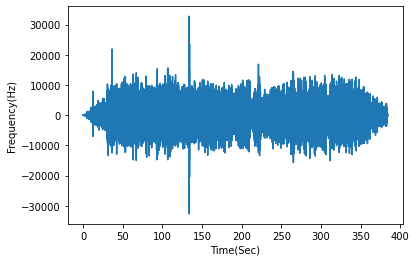

In [59]:
import numpy as np
import scipy.io.wavfile as wavfile
import pylab as pl
rate, data = wavfile.read('test5.wav')
t = np.arange(len(data[:,0]))*1.0/rate
pl.plot(t, data[:,1])
pl.xlabel("Time(Sec)")
pl.ylabel("Frequency(Hz)")
pl.show()

# Modifying the sound using a Fourier Fast Transform
Then, the sound file is transformed using a fast foruier transform providing a graph of the .wav file in power(dB) over frequency(Hz).

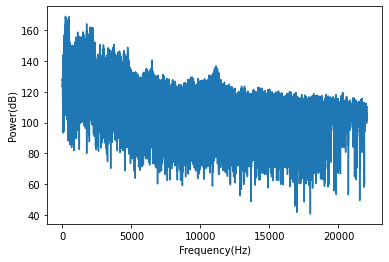

In [60]:
p = 20*np.log10(np.abs(np.fft.rfft(data[:, 0])))
f = np.linspace(0, rate/2.0, len(p))
pl.plot(f, p)
pl.xlabel("Frequency(Hz)")
pl.ylabel("Power(dB)")
pl.show()

# More graphs and some cleaning
The first graph is a plot of the wafveform of the .wav file

<Figure size 432x288 with 0 Axes>

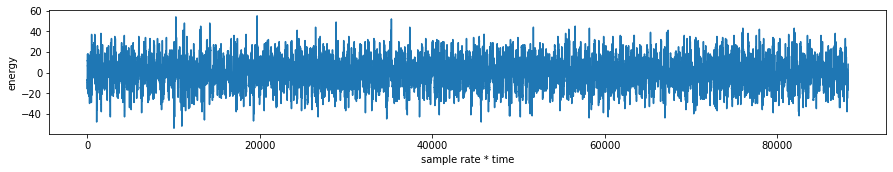

In [94]:
import wave
import matplotlib.pyplot as plt

signal_wave = wave.open('test5.wav', 'r')
sample_rate = 44100
sig = np.frombuffer(signal_wave.readframes(sample_rate), dtype=np.int16)
# Update to sig[1000:2000] or something like that to take segments of wav file
full_sig = sig[:]
trim_sig = sig[:4200]
# stero channel 1 and 2
left, right = data[1::2], data[1::2]
plt.figure(1)
plt.figure(figsize=(15, 5))

plot_a = plt.subplot(211)
plot_a.plot(full_sig)
plot_a.set_xlabel('sample rate * time')
plot_a.set_ylabel('energy')

plt.show()


This next graph is a frequency spectrogram of the full audio file

<Figure size 432x288 with 0 Axes>

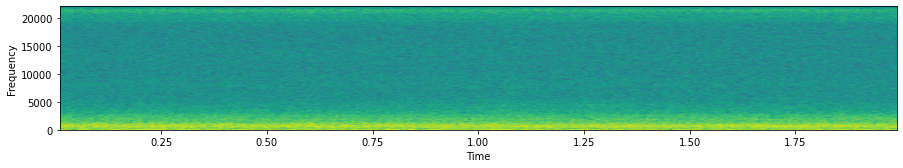

In [100]:
plt.figure(2)
plt.figure(figsize=(15, 5))

plot_c = plt.subplot(212)
plot_c.specgram(full_sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_c.set_xlabel('Time')
plot_c.set_ylabel('Frequency')
plt.show()

This graph is a cleaned up trimmed down section of the .wav file using a smaller sample rate

<Figure size 432x288 with 0 Axes>

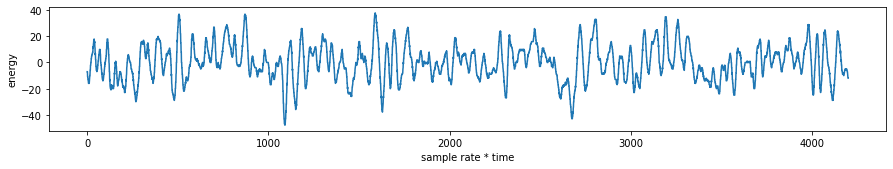

In [95]:
plt.figure(2)
plt.figure(figsize=(15, 5))
plot_b = plt.subplot(212)
plot_b.plot(trim_sig)
plot_b.set_xlabel('sample rate * time')
plot_b.set_ylabel('energy')
plt.show()

We take this smaller subsection, and view it as a frequency spectrogram graph. 

<Figure size 432x288 with 0 Axes>

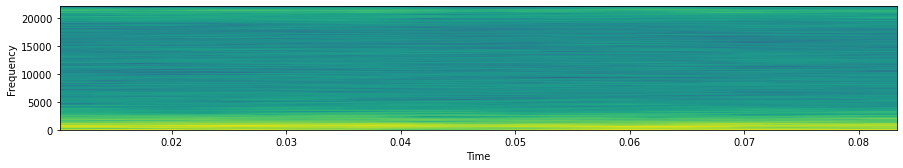

In [98]:
plt.figure(3)
plt.figure(figsize=(15, 5))
plot_c = plt.subplot(212)
plot_c.specgram(trim_sig, NFFT=1024, Fs=sample_rate, noverlap=900)
plot_c.set_xlabel('Time')
plot_c.set_ylabel('Frequency')
plt.show()

# More Visualization
Here is a Mel-Frequency spectrogram containing the frequency, time and decibels 

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

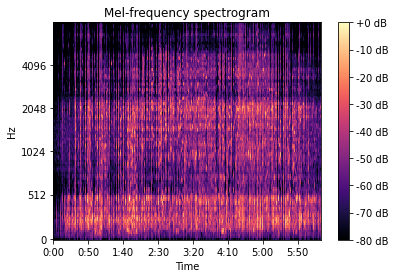

In [102]:
import librosa
import librosa.display
y, sr = librosa.load('test5.wav', sr=32000, mono=True)
melspec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels = 128)
melspec = librosa.power_to_db(melspec).astype(np.float32)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')